In [31]:
from pathlib import Path
import pandas as pd
import os
import toml
import numpy as np
from matplotlib import pyplot as plt
with open('config.toml', 'r', encoding='utf-8') as toml_file:
    config = toml.load(toml_file)
from util import sanitize_model_name
model_names = config['model_names']
alter_names = model_names.copy() # Create a copy to modify

for i, name in enumerate(alter_names):
    if name in config['alternative_names']: 
        alter_names[i] = config['alternative_names'][name]

In [36]:
inference_model = model_names[config['base_model_id']]
reference_answer = config['reference_model_name']
sanitized_inference_model = sanitize_model_name(inference_model)
sanitized_reference_answer = sanitize_model_name(reference_answer)
evaluation_output_file_name = Path(f"evaluation_output_of_{sanitized_inference_model}_by_{sanitized_reference_answer}.parquet")
project_dir = Path.cwd()
output_path = project_dir / "eval_output"
evaluation_output_df = pd.read_parquet(output_path / evaluation_output_file_name)

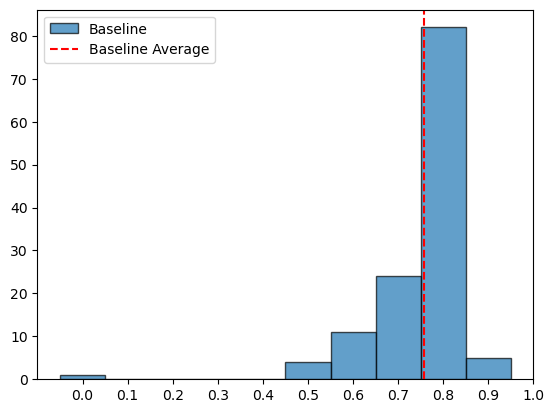

In [37]:
from matplotlib import pyplot as plt
scores = evaluation_output_df['score'].tolist()
average_score = np.mean(scores)
bin_edges = np.arange(-0.05, 1.05, 0.1)
plt.hist(scores, bins=bin_edges, label='Baseline', edgecolor='black', alpha=0.7)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.axvline(average_score, color='r', linestyle='--', label='Baseline Average')
plt.legend()
plt.show()

In [38]:
trained_inference_model = model_names[config['trained_model_id']]
reference_answer = config['reference_model_name']
sanitized_trained_inference_model = sanitize_model_name(trained_inference_model)
trained_evaluation_output_file_name = Path(f"trained_evaluation_output_of_{sanitized_trained_inference_model}_by_{sanitized_reference_answer}.parquet")
trained_evaluation_output_df = pd.read_parquet(output_path / trained_evaluation_output_file_name)

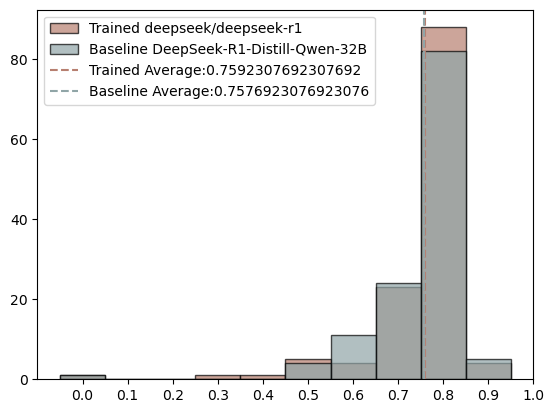

In [39]:
trained_scores = trained_evaluation_output_df['score'].tolist()
trained_average_score = np.mean(trained_scores)
morandi_red = '#B77F70'
morandi_blue = '#90A5A7'

plt.hist(trained_scores, bins=bin_edges, label=f'Trained {alter_names[2]}', edgecolor='black', alpha=0.7, color=morandi_red)
plt.hist(scores, bins=bin_edges, label=f'Baseline {alter_names[0]}', edgecolor='black', alpha=0.7, color=morandi_blue)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.axvline(trained_average_score, color=morandi_red, linestyle='--', label=f'Trained Average:{trained_average_score}')
plt.axvline(average_score, color=morandi_blue, linestyle='--', label=f'Baseline Average:{average_score}')
plt.legend()
plt.show()

In [42]:
low_score_reasons = trained_evaluation_output_df[trained_evaluation_output_df.score < 0.5]['reason'].to_list()
for reason in low_score_reasons:
    print(reason)

Actual Output提供了优化电流密度和压强剖面的步骤，但未包含Expected Output中的核心结论、背景概念、机理分析、定量估算等关键部分。Actual Output未提及反磁剪、安全因子台阶、中空压强剖面等具体优化方法，也未涉及β_N等物理量。推导思路与Expected Output不一致，结论缺乏深度和定量支持。
核心结论中βN值错误：实际输出为6.7，预期为2.8；平均压强错误：实际输出为2.22 MPa，预期为2.8×10^5 Pa（0.28 MPa）。物理量定义不一致：实际输出使用β = 8πP/B_t^2，预期使用β_t = 2μ_0⟨p⟩/B_t^2。
实际输出中结论Δλ=2.7nm与预期输出Δλ=0.14nm相差巨大，且推导公式错误地使用了Ry常数而非多普勒展宽标准公式。
